# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Generate the Cities List by Using the citipy Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


# Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

In [9]:
# Define an empty list to fetch the weather data for each city
city_data = []

In [10]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    try:
        # Send a request to the API
        response = requests.get(city_url)
        response.raise_for_status()  # Raises an HTTPError for bad responses

        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

          # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | vegreville
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | kudahuvadhoo
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | pandan
Processing Record 9 of Set 1 | demre
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | labrador city
Processing Record 12 of Set 1 | baro
Processing Record 13 of Set 1 | magog
Processing Record 14 of Set 1 | sinop
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | torghay
Processing Record 18 of Set 1 | maffra
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | kerikeri
Processing Record 21 of Set 1 | daru
Processing Record 22 of Set 1 | stanley
Processing Record 23 of Set 1 | is

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,20.30,77,48,0.38,US,1722592873
1,vegreville,53.5001,-112.0518,15.17,96,84,3.60,CA,1722592905
2,thompson,55.7435,-97.8558,14.09,82,0,3.09,CA,1722592723
3,grytviken,-54.2811,-36.5092,-1.23,98,100,4.80,GS,1722592697
4,castro,-24.7911,-50.0119,10.29,98,16,2.52,BR,1722592909


In [16]:
from pathlib import Path
# Add a unique ID column
city_data_df['ID'] = range(1, len(city_data_df) + 1)

# Reorder columns to ensure ID is the first column
columns_order = ['ID'] + [col for col in city_data_df.columns if col != 'ID']
city_data_df = city_data_df[columns_order]

# Define the directory using pathlib
output_directory = Path('output_data')

# Create the directory if it doesn't exist
output_directory.mkdir(parents=True, exist_ok=True)

# Define the file path
file_path = output_directory / 'city_weather_data.csv'

# Save the DataFrame to a CSV file
city_data_df.to_csv(file_path, index=False)

In [17]:
# Display sample data
city_data_df.head()

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,albany,42.6001,-73.9662,20.30,77,48,0.38,US,1722592873
1,2,vegreville,53.5001,-112.0518,15.17,96,84,3.60,CA,1722592905
2,3,thompson,55.7435,-97.8558,14.09,82,0,3.09,CA,1722592723
3,4,grytviken,-54.2811,-36.5092,-1.23,98,100,4.80,GS,1722592697
4,5,castro,-24.7911,-50.0119,10.29,98,16,2.52,BR,1722592909


### Latitude Vs. Temperature

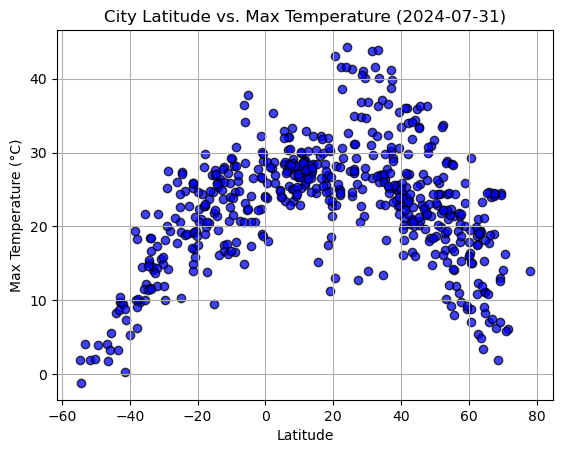

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], c='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature (2024-07-31)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# Latitude Vs. Humidity

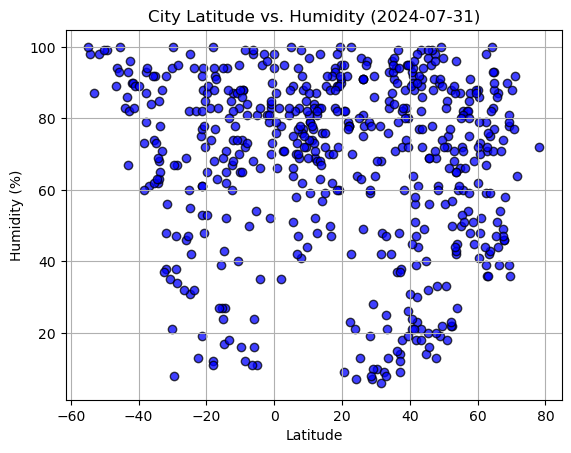

In [19]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], c='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2024-07-31)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# Latitude Vs. Cloudiness

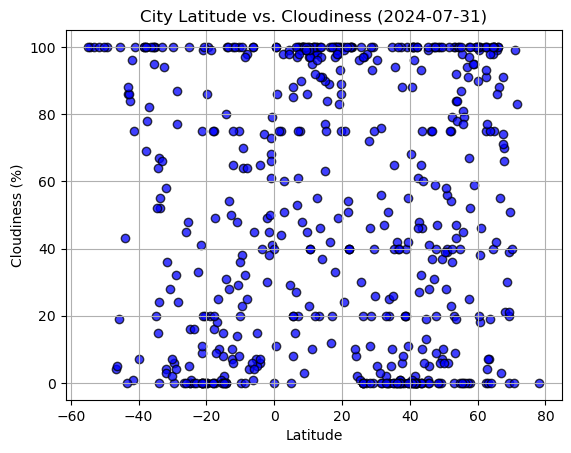

In [20]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], c='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-07-31)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# Latitude vs. Wind Speed

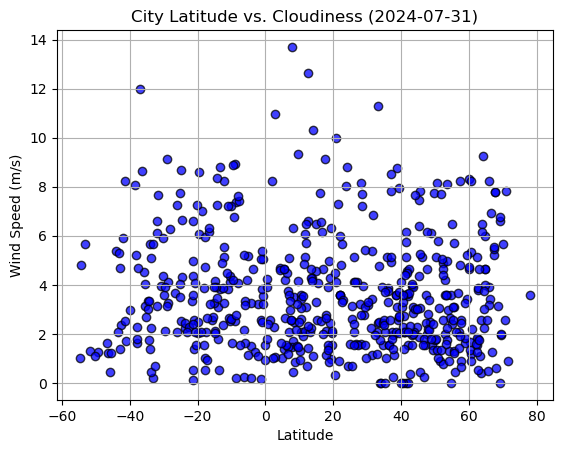

In [21]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], c='blue', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2024-07-31)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# Requirement 2: Compute Linear Regression for Each Relationship

In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, hemisphere_name, xlabel, ylabel, file_name):
    # Compute linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * x + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    # Plot scatter plot and regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, c='blue', edgecolors='black', alpha=0.75, label='Cities')
    plt.plot(x, regress_values, 'r-', label=f'Regression Line ({line_eq})')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.annotate(line_eq, (x.min() + 1, y.min() + 1), fontsize=12, color='red')
    
    # Show r-squared value
    print(f"{hemisphere_name} R-squared: {r_value**2:.4f}")

    # Save the figure
    plt.savefig(os.path.join(output_directory, file_name))

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere.head()

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,albany,42.6001,-73.9662,20.30,77,48,0.38,US,1722592873
1,2,vegreville,53.5001,-112.0518,15.17,96,84,3.60,CA,1722592905
2,3,thompson,55.7435,-97.8558,14.09,82,0,3.09,CA,1722592723
5,6,kudahuvadhoo,2.6708,72.8944,28.70,71,98,2.30,MV,1722592910
6,7,kodiak,57.7900,-152.4072,9.73,87,0,2.57,US,1722592715


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemisphere.head()

,ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,4,grytviken,-54.2811,-36.5092,-1.23,98,100,4.80,GS,1722592697
4,5,castro,-24.7911,-50.0119,10.29,98,16,2.52,BR,1722592909
9,10,waitangi,-43.9535,-176.5597,8.23,83,43,5.36,NZ,1722592714
15,16,blackmans bay,-43.0167,147.3167,9.74,67,86,4.68,AU,1722592708
17,18,maffra,-37.9667,146.9833,6.22,79,69,1.62,AU,1722592924


#  Temperature vs. Latitude Linear Regression Plot

Northern Hemisphere R-squared: 0.2720


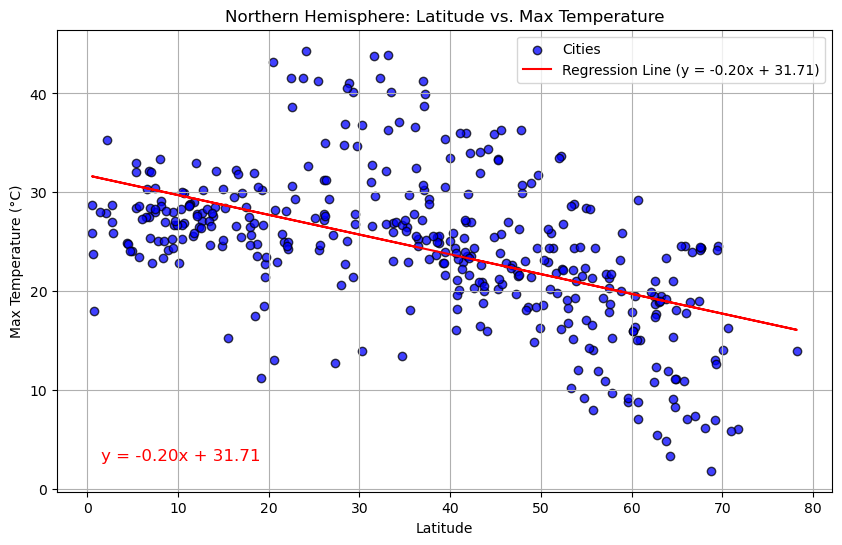

In [25]:
# Plot Northern Hemisphere
plot_linear_regression(
    x=northern_hemisphere['Lat'],
    y=northern_hemisphere['Max Temp'],
    hemisphere_name='Northern Hemisphere',
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    file_name='Fig_Northern_Tem.png'
)
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature');

Southern Hemisphere R-squared: 0.6180


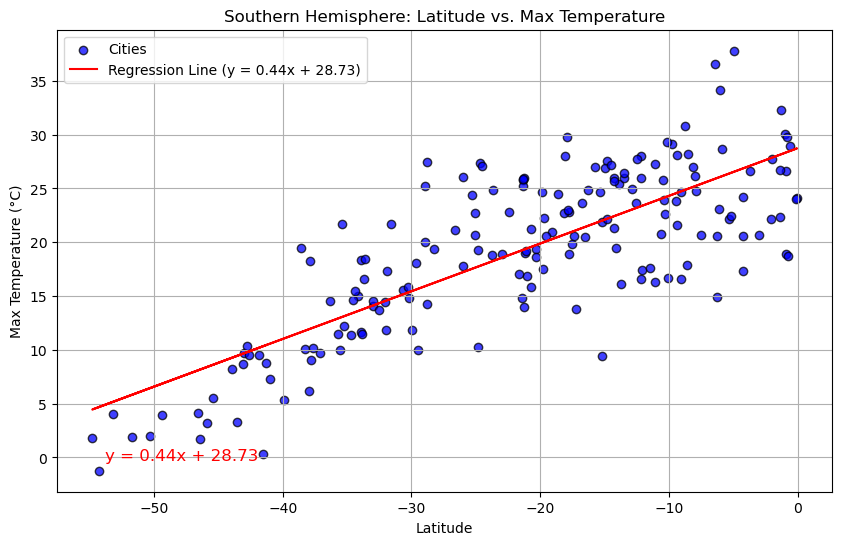

In [26]:
# Plot Southern Hemisphere
plot_linear_regression(
    x=southern_hemisphere['Lat'],
    y=southern_hemisphere['Max Temp'],
    hemisphere_name='Southern Hemisphere',
    xlabel='Latitude',
    ylabel='Max Temperature (°C)',
    file_name='Fig_Southern_Tem.png'
)
plt.title('Southern Hemisphere: Latitude vs. Max Temperature');

**Discussion about the linear relationship:** Based on the two graphs, we can see that the max temperature increases as latitude increases. Both Latitudes have strong correlations. This situation is consistent with reality. The closer to the equator, the higher the temperature; the farther from the equator, the lower the temperature.

# Humidity vs. Latitude Linear Regression Plot

Northern Hemisphere R-squared: 0.0164


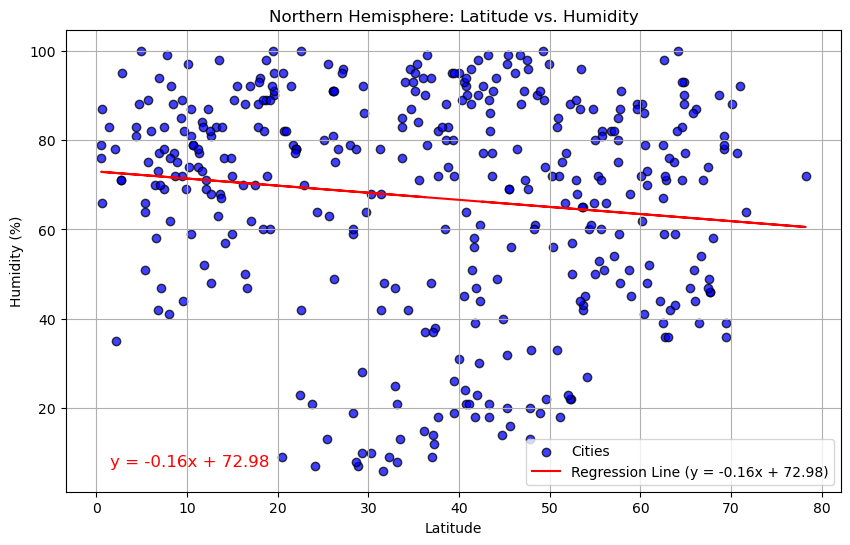

In [27]:
# Plot Northern Hemisphere
plot_linear_regression(
    x=northern_hemisphere['Lat'],
    y=northern_hemisphere['Humidity'],
    hemisphere_name='Northern Hemisphere',
    xlabel='Latitude',
    ylabel='Humidity (%)',
    file_name='Fig_Northern_Hum.png'
)
plt.title('Northern Hemisphere: Latitude vs. Humidity');

Southern Hemisphere R-squared: 0.0289


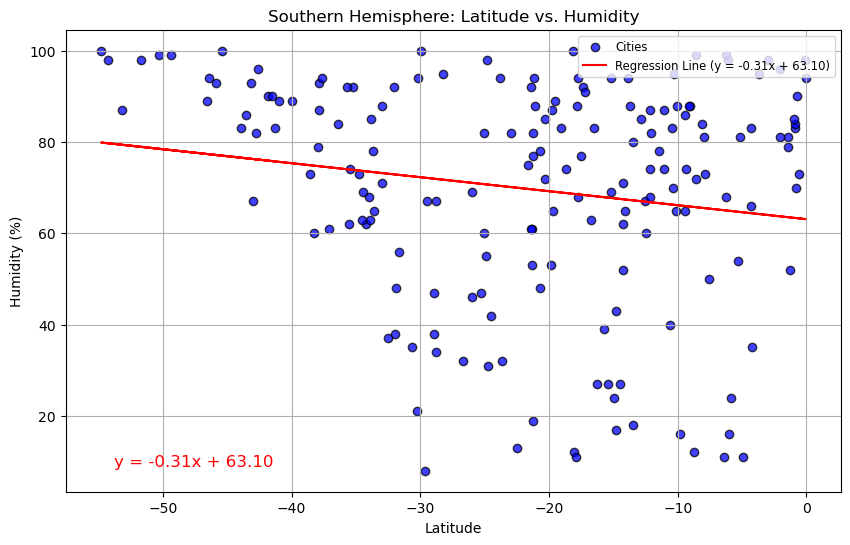

In [28]:
# Plot Southern Hemisphere
plot_linear_regression(
    x=southern_hemisphere['Lat'],
    y=southern_hemisphere['Humidity'],
    hemisphere_name='Southern Hemisphere',
    xlabel='Latitude',
    ylabel='Humidity (%)',
    file_name='Fig_Southern_Hum.png'
)
plt.legend(loc='upper right', fontsize='small')
plt.title('Southern Hemisphere: Latitude vs. Humidity');

**Discussion about the linear relationship:** Based on the two graphs, we can see that the humidity decreases slightly as latitude increases in the northern hemisphere. At the same time, the humidity decreases as latitude increases in the southern hemisphere. On the other hand, the data points appear to be evenly distributed without any obvious clustering. This means that humidity has a weak correlation with latitude. There might be some other factors which affect humidity as well.

# Cloudiness vs. Latitude Linear Regression Plot

Northern Hemisphere R-squared: 0.0211


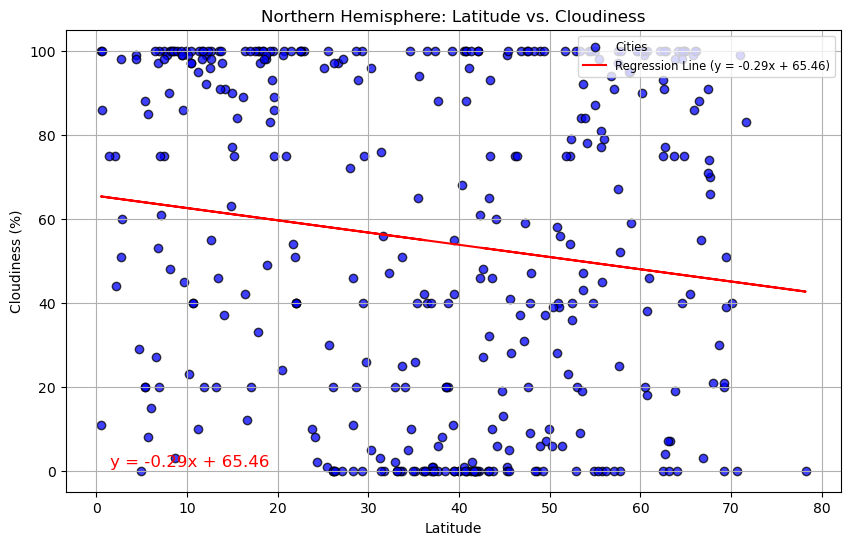

In [29]:
# Plot Northern Hemisphere
plot_linear_regression(
    x=northern_hemisphere['Lat'],
    y=northern_hemisphere['Cloudiness'],
    hemisphere_name='Northern Hemisphere',
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    file_name='Fig_Northern_Cloud.png'
)
plt.legend(loc='upper right', fontsize='small')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness');

Southern Hemisphere R-squared: 0.0610


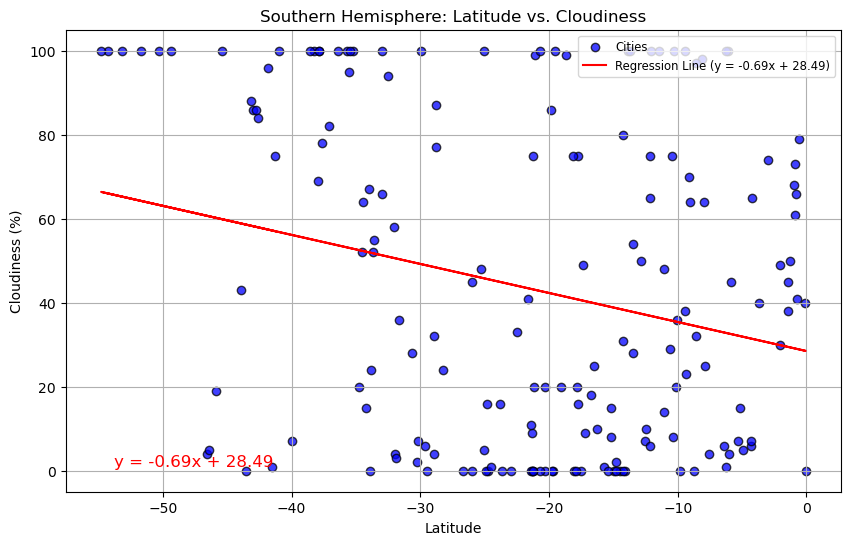

In [30]:
# Plot Southern Hemisphere
plot_linear_regression(
    x=southern_hemisphere['Lat'],
    y=southern_hemisphere['Cloudiness'],
    hemisphere_name='Southern Hemisphere',
    xlabel='Latitude',
    ylabel='Cloudiness (%)',
    file_name='Fig_Southern_Cloud.png'
)
plt.legend(loc='upper right', fontsize='small')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness');

**Discussion about the linear relationship:** Based on the two graphs, we can see that cloudiness decreases quickly as latitude increases in the northern hemisphere. On the other hand, cloudiness decreases significantly as latitude increases. Therefore, cloudiness has a strong correlation with latitudes. However, they are quite different from each other. In the northern hemisphere, the closer to the equator, the higher the cloudiness; while in the southern, the farther from the equator, the higher the cloudiness. The data points appear to be evenly distributed without any obvious clustering. There might be some other factors that affect cloudiness as well.

# Wind Speed vs. Latitude Linear Regression Plot

Northern Hemisphere R-squared: 0.0006


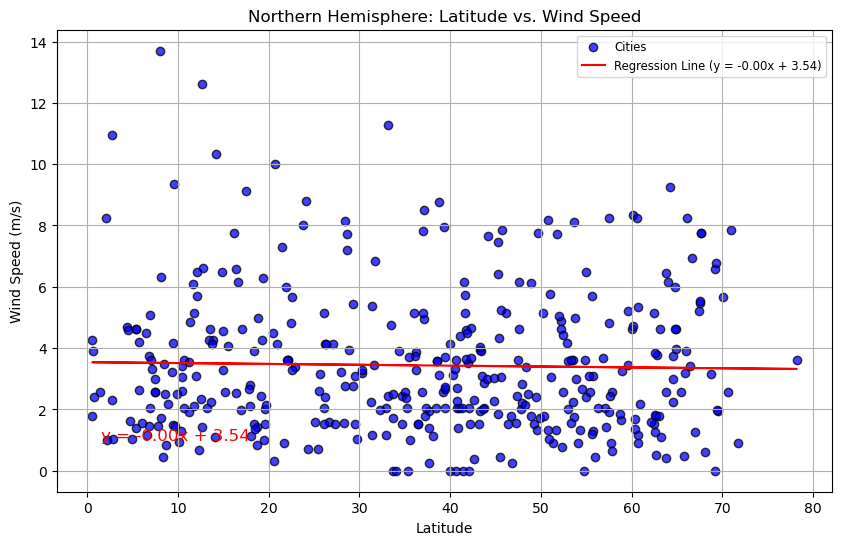

In [31]:
# Plot Northern Hemisphere
plot_linear_regression(
    x=northern_hemisphere['Lat'],
    y=northern_hemisphere['Wind Speed'],
    hemisphere_name='Northern Hemisphere',
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    file_name='Fig_Northern_Wind.png'
)
plt.legend(loc='upper right', fontsize='small')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed');

Southern Hemisphere R-squared: 0.0001


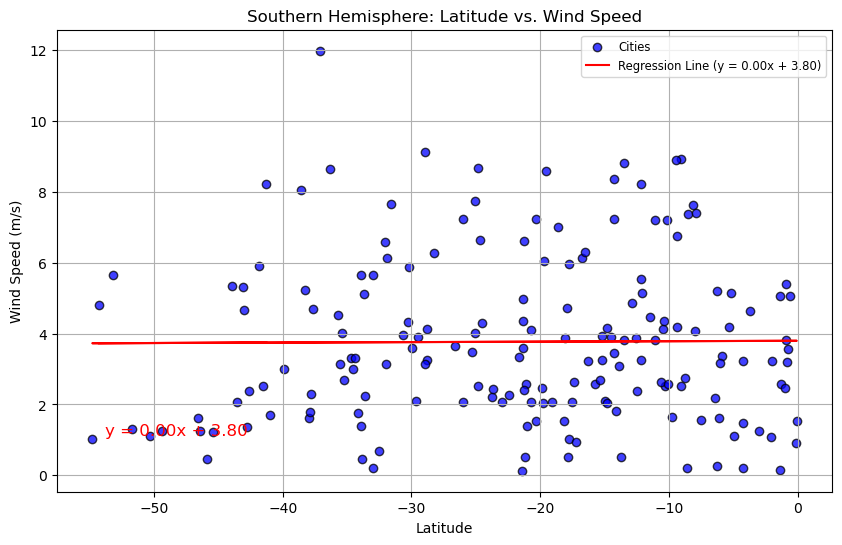

In [33]:
# Plot Southern Hemisphere
plot_linear_regression(
    x=southern_hemisphere['Lat'],
    y=southern_hemisphere['Wind Speed'],
    hemisphere_name='Southern Hemisphere',
    xlabel='Latitude',
    ylabel='Wind Speed (m/s)',
    file_name='Fig_Southern_Wind.png'
)
plt.legend(loc='upper right', fontsize='small')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed');

**Discussion about the linear relationship:** Based on the two graphs, we can see that wind speed decreases as latitude increases in the northern hemisphere. On the other hand, wind speed decreases as latitude increases in southern hemisphere. However, the slop is more flatter and r-squared is nearly 0. So we can say from above two graph, wind speed does not have much correlation with latitude.